# Data Extraction

In [1]:
import pandas as pd
import numpy as np

myvars = {}
with open("nihatoom-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()


import MySQLdb
conn = MySQLdb.connect(host = "localhost",user=myvars['DB username'], passwd=myvars['DB password'], db='I501Fa21grp05_db', local_infile = 1)
cursor = conn.cursor()

In [2]:
# Pull data from database where the age of the respondant is 25 years old or greater.

df = pd.read_sql('select CATAG6, CIGAGE, ALCTRY AS ALCAGE, MJAGE, COCAGE, CRKAGE, HERAGE, METHAMAGE, CIGEVER, ALCEVER, MJEVER, COCEVER, CRKEVER, HEREVER, METHAMFLAG from Part1 where CATAG6 > 2;',conn)

In [3]:
df.head()

,CATAG6,CIGAGE,ALCAGE,MJAGE,COCAGE,CRKAGE,HERAGE,METHAMAGE,CIGEVER,ALCEVER,MJEVER,COCEVER,CRKEVER,HEREVER,METHAMFLAG
0,4,16,14,15,16,16,991,991,1,1,1,1,1,2,0
1,3,991,21,991,991,991,991,991,2,1,2,2,91,2,0
2,3,18,21,18,991,991,991,991,1,1,1,2,91,2,0
3,3,999,18,991,991,991,991,991,1,1,2,2,91,2,0
4,4,991,991,991,991,991,991,991,2,2,2,2,91,2,0


In [4]:
len(df)

289178

# Data Cleansing

In [5]:
# Here I'm defining a function to more easilly cleanse the data column by column.

#dframe - Data Frame name; column-Column to recode; bad_val- a list of values to recode; recode_val - value to replace with
def recodeColumn(dframe, column, bad_val, recode_val):
    dframe[column].replace(bad_val,recode_val,inplace=True)



In [6]:
print(df['ALCAGE'].unique())

[ 14  21  18 991  12  16  20  13  15  17  19 994  38  22  11  32  23   9
  25  10   7  30  34  24  35   6  26 998 997   1   8   3  64  40   5  27
   4  50  33   2  71  29  28  47  36  45  37  31  42  56 985  41  60  49
  43  52  39  51  44  48  66  55  67  46  62  65  72  73  53  75  78  58
  59  87  70  69  54]


In [7]:
# Recode Age of first use columns
# AGE 1-99, 200 - NEVER
recodeColumn(df, 'CIGAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'ALCAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'MJAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'COCAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'CRKAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'HERAGE', [985,991,994,997,998,999,0], 200)
recodeColumn(df, 'METHAMAGE', [985,991,994,997,998,999,0], 200)


In [8]:
# Recode ever done drugs
# 1-Yes, 2-No

recodeColumn(df, 'CIGEVER', [2], 0)
recodeColumn(df, 'ALCEVER', [94,2,97,85], 0)
recodeColumn(df, 'MJEVER', [94,2,97,85], 0)
recodeColumn(df, 'COCEVER', [94,2,97,85], 0)
recodeColumn(df, 'CRKEVER', [94,2,97,85,91,98], 0)
recodeColumn(df, 'HEREVER', [94,2,97,85], 0)
recodeColumn(df, 'METHAMFLAG', [94,2,97,85], 0)

In [9]:
df.head()

,CATAG6,CIGAGE,ALCAGE,MJAGE,COCAGE,CRKAGE,HERAGE,METHAMAGE,CIGEVER,ALCEVER,MJEVER,COCEVER,CRKEVER,HEREVER,METHAMFLAG
0,4,16,14,15,16,16,200,200,1,1,1,1,1,0,0
1,3,200,21,200,200,200,200,200,0,1,0,0,0,0,0
2,3,18,21,18,200,200,200,200,1,1,1,0,0,0,0
3,3,200,18,200,200,200,200,200,1,1,0,0,0,0,0
4,4,200,200,200,200,200,200,200,0,0,0,0,0,0,0


In [10]:
#df['Gateway_Age_Flag'] = np.where(df['Gateway_Age'] < df['Hard_Age'],1,0)

gf = ['MJEVER']
hf = ['COCEVER','CRKEVER','HEREVER','METHAMFLAG']

df['Gateway_Flag'] = np.where(df[gf].sum(axis=1) > 0,1,0)
df['Hard_Flag'] = np.where(df[hf].sum(axis=1) > 0,1,0)
df.head()

,CATAG6,CIGAGE,ALCAGE,MJAGE,COCAGE,CRKAGE,HERAGE,METHAMAGE,CIGEVER,ALCEVER,MJEVER,COCEVER,CRKEVER,HEREVER,METHAMFLAG,Gateway_Flag,Hard_Flag
0,4,16,14,15,16,16,200,200,1,1,1,1,1,0,0,1,1
1,3,200,21,200,200,200,200,200,0,1,0,0,0,0,0,0,0
2,3,18,21,18,200,200,200,200,1,1,1,0,0,0,0,1,0
3,3,200,18,200,200,200,200,200,1,1,0,0,0,0,0,0,0
4,4,200,200,200,200,200,200,200,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'METHAMFLAG ')

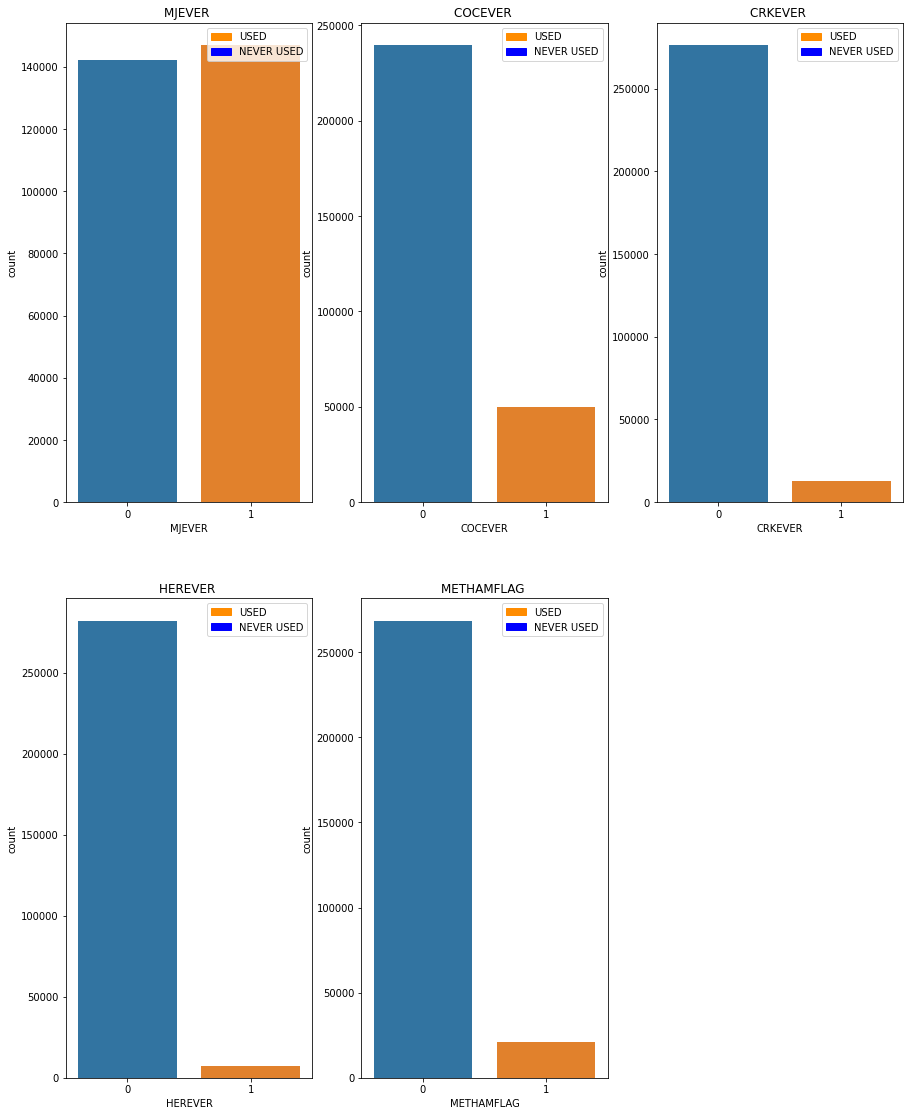

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,30))

ax1 = fig.add_subplot(3,3,1)
sns.countplot(data = df, x = 'MJEVER', ax=ax1)
colors = {'USED':'darkorange', 'NEVER USED':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('MJEVER ')

ax2 = fig.add_subplot(3,3,2)
sns.countplot(data = df, x = 'COCEVER', ax=ax2)
colors = {'USED':'darkorange', 'NEVER USED':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('COCEVER ')


ax3 = fig.add_subplot(3,3,3)
sns.countplot(data = df, x = 'CRKEVER', ax=ax3)
colors = {'USED':'darkorange', 'NEVER USED':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('CRKEVER ')

ax4 = fig.add_subplot(3,3,4)
sns.countplot(data = df, x = 'HEREVER', ax=ax4)
colors = {'USED':'darkorange', 'NEVER USED':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('HEREVER ')

ax5 = fig.add_subplot(3,3,5)
sns.countplot(data = df, x = 'METHAMFLAG', ax=ax5)
colors = {'USED':'darkorange', 'NEVER USED':'blue' }         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.title('METHAMFLAG ')

In [12]:
#Drop redundant columns

to_drop = ['CIGEVER','ALCEVER','MJEVER','COCEVER','CRKEVER','HEREVER','METHAMFLAG']
df.drop(columns=to_drop, inplace=True)

In [13]:
print(df.columns)

Index(['CATAG6', 'CIGAGE', 'ALCAGE', 'MJAGE', 'COCAGE', 'CRKAGE', 'HERAGE',
       'METHAMAGE', 'Gateway_Flag', 'Hard_Flag'],
      dtype='object')


In [14]:
from sklearn import metrics
cm = metrics.confusion_matrix(df['Gateway_Flag']
                              ,df['Hard_Flag'])

print(cm)

[[140550   1748]
 [ 94616  52264]]


In [15]:
df.head()

,CATAG6,CIGAGE,ALCAGE,MJAGE,COCAGE,CRKAGE,HERAGE,METHAMAGE,Gateway_Flag,Hard_Flag
0,4,16,14,15,16,16,200,200,1,1
1,3,200,21,200,200,200,200,200,0,0
2,3,18,21,18,200,200,200,200,1,0
3,3,200,18,200,200,200,200,200,0,0
4,4,200,200,200,200,200,200,200,0,0


In [16]:
gateway = ['MJAGE']
hard = ['COCAGE','CRKAGE','HERAGE','METHAMAGE']

df['Gateway_Age'] = df[gateway].min(axis=1)
df['Hard_Age'] = df[hard].min(axis=1)

df.head()

,CATAG6,CIGAGE,ALCAGE,MJAGE,COCAGE,CRKAGE,HERAGE,METHAMAGE,Gateway_Flag,Hard_Flag,Gateway_Age,Hard_Age
0,4,16,14,15,16,16,200,200,1,1,15,16
1,3,200,21,200,200,200,200,200,0,0,200,200
2,3,18,21,18,200,200,200,200,1,0,18,200
3,3,200,18,200,200,200,200,200,0,0,200,200
4,4,200,200,200,200,200,200,200,0,0,200,200


In [17]:
recodeColumn(df,'Gateway_Age',200,0)
recodeColumn(df,'Hard_Age',200,0)


to_drop = ['CATAG6','CIGAGE', 'ALCAGE', 'MJAGE', 'COCAGE', 'CRKAGE', 'HERAGE', 'METHAMAGE']
df.drop(columns=to_drop, inplace=True)

print(df.columns)

Index(['Gateway_Flag', 'Hard_Flag', 'Gateway_Age', 'Hard_Age'], dtype='object')


In [18]:
df.head()

,Gateway_Flag,Hard_Flag,Gateway_Age,Hard_Age
0,1,1,15,16
1,0,0,0,0
2,1,0,18,0
3,0,0,0,0
4,0,0,0,0


In [19]:
import numpy as np

df['drop'] = np.where((df['Gateway_Age'] == df['Hard_Age']) & df['Gateway_Age'] ==1 ,1,0)
df['Gateway_Age_Flag'] = np.where(df['Gateway_Age']<df['Hard_Age'],1,0)
df = df[df['drop']==0]

In [20]:
df = df[['Gateway_Flag','Hard_Flag','Gateway_Age','Hard_Age','Gateway_Age_Flag']]
df.head()

,Gateway_Flag,Hard_Flag,Gateway_Age,Hard_Age,Gateway_Age_Flag
0,1,1,15,16,1
1,0,0,0,0,0
2,1,0,18,0,0
3,0,0,0,0,0
4,0,0,0,0,0


# Start Statistical Analysis

In [21]:
cm_hard_flag = metrics.confusion_matrix(df['Hard_Flag'],df['Gateway_Age_Flag'])
cm_hard_flag = cm_hard_flag/cm_hard_flag.sum()

cm_hard_reg = metrics.confusion_matrix(df['Hard_Flag'],df['Gateway_Flag'])
cm_hard_reg = cm_hard_reg/cm_hard_reg.sum()

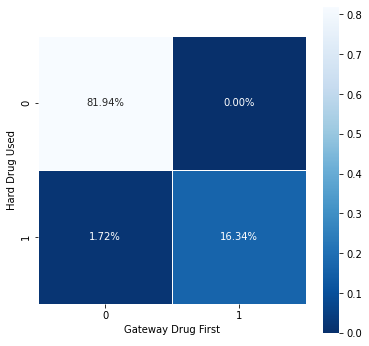

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
plt.figure(figsize=(6,6))
sns.heatmap(cm_hard_flag, annot=True, fmt=".2%", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Hard Drug Used');
plt.xlabel('Gateway Drug First');

In [23]:
df.sum()

Gateway_Flag         144696
Hard_Flag             51828
Gateway_Age         2601832
Hard_Age            1093472
Gateway_Age_Flag      46898
dtype: int64

In [24]:
len(df)


286994

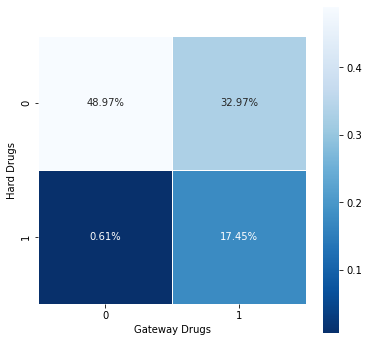

In [25]:
plt.figure(figsize=(6,6))
sns.heatmap(cm_hard_reg, annot=True, fmt=".2%", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Hard Drugs');
plt.xlabel('Gateway Drugs');

# Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(df[['Gateway_Age','Gateway_Flag']], df['Hard_Flag'], test_size = .4)



In [27]:
from sklearn.linear_model import LogisticRegression

#Define the classification algorithm.  n_estimators = 100 is the default, this is the number of trees in the forest.
logreg_hard = LogisticRegression(random_state=0,max_iter=500)
logreg_hard.fit(xTrain,yTrain)
logreg_hard_pred = logreg_hard.predict(xTest)
logreg_hard_probs = logreg_hard.predict_proba(xTest)
logreg_hard_score = logreg_hard.score(xTest,yTest)

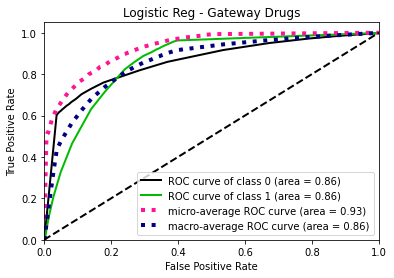

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
import scikitplot

scikitplot.metrics.plot_roc(yTest, logreg_hard_probs, title = 'Logistic Reg - Gateway Drugs')
plt.show()

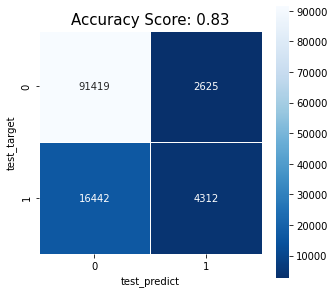

In [29]:
c_m = metrics.confusion_matrix(yTest, logreg_hard_pred)
plt.figure(figsize=(5,5))
sns.heatmap(c_m, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r');
title = 'Accuracy Score: {:.2f}'.format(logreg_hard_score)
plt.ylabel('test_target');
plt.xlabel('test_predict');
plt.title(title, size = 15);

Feature: 0, Score: -0.15307
Feature: 1, Score: 6.43571


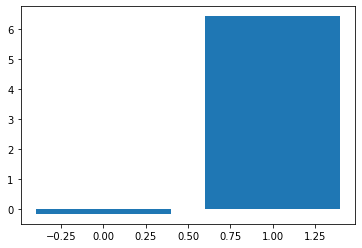

In [30]:
from matplotlib import pyplot

importance = logreg_hard.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [31]:
import statsmodels.api as sm
logit_model=sm.Logit(yTrain,xTrain)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.646421
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Hard_Flag   No. Observations:               172196
Model:                          Logit   Df Residuals:                   172194
Method:                           MLE   Df Model:                            1
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 -0.3693
Time:                        12:49:20   Log-Likelihood:            -1.1131e+05
converged:                       True   LL-Null:                       -81291.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gateway_Age     -0.1535      0.002    -73.965      0.000      -0.158      -0.149
Gateway_Flag     2.0110

As a result, we can see that the usage of marijuana is a statistically significant predictor for using harder drugs later in life.  This, of course, only shows that there is a correlation between the two events, and not that using marijuana increases the likelihood of using harder drugs later in life.

In [32]:
from sklearn import feature_selection
chi2, p = feature_selection.chi2(df[['Gateway_Age_Flag']],df['Hard_Flag'])

Chi2 = pd.DataFrame(['Gateway_Age_Flag'],columns = ['Features'])
Chi2['Chi2'] = chi2
Chi2['p-val'] = p

print(Chi2)

           Features           Chi2  p-val
0  Gateway_Age_Flag  212796.462684    0.0
